# Assignment: Cournot competition in practice
|Name|SNR|
|----|-------|
|Judith van Dijk|1258672|
|Hiske van Rooi|1259698|

## Research question and subquestions
In this assignment, we will look at several forms of Cournot competition, being standard Cournot quantitiy competition and Stackelberg quantity competition. We will start with a short introduction about the theory behind the models, after which we will focus on several applications. We will look at both a symmetric and asymmetric two firm case for both models. Our research question will be:

- *Which model of Cournot competition has the preference?*

This question will be separated into several categories, for which we will show which party favors which form of competion. The subquestions of the research thus are:

- *Which model of Cournot competition is favoured by firms?*

- *Which model of Cournot competition gives the highest consumer surplus?*

In this assignment, we consider a duopoly who can decide the price $p$ of its products and who compete in quantities. We compare the price chosen by the firms with the welfare maximizing price.

## Motivation and introduction
Cournot competition is a repetitive theory in the field of economics. This assignment aims at teaching students, who are new to Cournot competition, the standard theory and prediction and the use of multiple models. Our research question is relevant for economics to provide economic intuition behind game theory and the use of economic models.

## Method and assumptions
By modeling and defining relevant variables, we will find answers to our main research question and our subquestions. By changing the parameter values, we will also do a sensitivy analysis.


For answering the relevant question and subquestions, we make a couple of assumptions. First of all, we assume that there are only two firms in the market, maximizing their own profit. It is common knowledge that all players are rational and both firms produce a homogeneous good, so we have a case of perfect substitutes. The profit function of each player is stricly concave and in the symmetric case, discussed below, we assume homogeneous costs. In the asymmetric case however, we assume heterogeneity in costs. Lastly, we assume that there are no fixed costs.

## Execution
The inverse market demand function depends on the quantity $Q$ in the following way:

$$
p(Q) = max (a - Q; 0)
$$



In [42]:
# We define the inverse market demand function

def p(a,q_i, q_j):
    p = (a - (q_i + q_j))
    return (p)

In the above code we defined the inverse demand function. First we stated the base of the inverse demand function, for which we state the reaction function of price to quantity. Next we constricted the inverse demand function to be non-negative. We will start with the standard two firm case below.

### Standard two firm case
In the standard two firm case there are two firms, firm i and firm j. We will start with defining the specifics of the two firm game. Here total quantity produced is the sum of the quantity of firm i and firm j, so: $Q = q_i + q_j$. The profit of the firm equals total revenue (price times own quantity produced) minus total costs (marginal costs times own quantity produced). The best response function is calculated by setting the FOC equal to zero.

Inverse demand function: 
$
p(Q) = max(a - Q; 0) = a - (q_i + q_j)
$


Cost functions: 
$
C_i(q_i) = c_i*q_i
$


Number of players: 
$
I = 2
$


Strategy sets: 
$S_i = [0; \infty); i = 1; 2
$


Payoff functions: 
$\pi_i(q_i; q_j) = (p - c_i) * q_i 
= (a - (q_i + q_j) - c_i)q_i; i = 1; 2; i \neq j
$

First order condition (FOC):
$\pi_i' = a - 2q_i - q_j - c_i
$

Best response function firm i:
$q_i = 1/2(a - q_j - c_i)
$

Best response function firm j:
$q_j = 1/2(a - q_i - c_j)
$

In [54]:
# We define the cost function, the marginal cost funtion, the profit function and the first order condition for both firms
def cost(c_i,q_i):
    return c_i*q_i

def mc(c_i):
    return c_i

def profit_firm_i(a,q_i,q_j,c_i):
    profit = (p(a,q_i,q_j) - mc(c_i))*q_i
    return profit

def FOC_i(a,q_i,q_j,c_j):
    FOC_i = a - 2*q_i - q_j - c_i
    return FOC_i

def cost(c_j,q_j):
    return c_j*q_j

def mc(c_j):
    return c_j

def profit_firm_j(a,q_i,q_j,c_j):
    profit = (p(a,q_i,q_j) - mc(c_j))*q_j
    return profit

def FOC_j(a,q_i,q_j,c_j):
    FOC_j = a - q_i - 2*q_j - c_j
    return FOC_j

In [51]:
# We now define the best response functions for both firms, setting the FOC equal to zero
def BR_i(a,q_j,c_i):
    q_i = 0.5*(a - q_j - c_i)
    return q_i

def BR_j(a,q_i,c_j):
    q_j = 0.5*(a - q_i - c_j)
    return q_j

In [19]:
import pandas as pd
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt

%matplotlib inline

### Cournot: Symmetric and Asymmetric

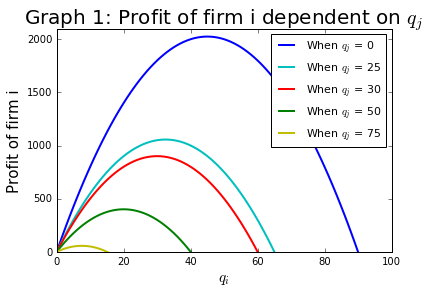

In [59]:
# We show the profit function of firm i dependent on the choice of the quantity of firm j
# We will start with a symmetric case, where the constant 'a' and the costs are the same for both firms
a = 100
c_i = 10
c_j = 10
c_j_h = 25 # this equals the costs of firm j under the asymmetric case we will discuss below

# The constant 'a' is set at 100 and a quantity above 100 will result in negative inverse demand
q_i = arange(0.0,101.0,1.0) 
q_j = arange(0.0,101.0,1.0)

plt.clf()
plt.plot(q_i, profit_firm_i(a,q_i,0,c_i),'-', color = 'b', linewidth = 2, label="When $q_j$ = 0")
plt.plot(q_i, profit_firm_i(a,q_i,25,c_i),'-', color = 'c', linewidth = 2, label="When $q_j$ = 25")
plt.plot(q_i, profit_firm_i(a,q_i,30,c_i),'-', color = 'r', linewidth = 2, label="When $q_j$ = 30")
plt.plot(q_i, profit_firm_i(a,q_i,50,c_i),'-', color = 'g', linewidth = 2, label="When $q_j$ = 50")
plt.plot(q_i, profit_firm_i(a,q_i,75,c_i),'-', color = 'y', linewidth = 2, label="When $q_j$ = 75")
plt.title("Graph 1: Profit of firm i dependent on $q_j$",fontsize = 20)
plt.xlabel("$q_i$",fontsize = 15)
plt.ylabel("Profit of firm i",fontsize = 15)
plt.xlim(0,100)
plt.ylim(0,2100)
plt.legend(fontsize = 11)
plt.show()

In Graph 1 above one can see multiple profit functions of firm i dependent on the chosen quantity of firm j $q_j$. One can see that the lower the $q_j$, the higher the plotted line of $\pi_i$. Firm i will always choose to maximize its profit by choosing $q_i$ at the top of the parabola. One can calculate this point by taking the derivative of the profit ($\pi_i'$) and setting it equal to zero. Since we assume homogeneous costs for both firms, this is how the profit of firm j dependent on $q_i$ would look like as well.

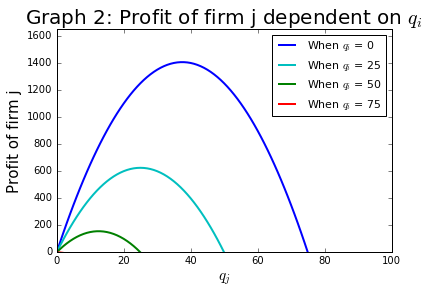

In [60]:
# This is the asymmetric case, where the constant 'a' is equal for both firms but the costs are not
plt.clf()
plt.plot(q_j, profit_firm_j(a,0,q_j, c_j_h),'-', color = 'b', linewidth = 2, label="When $q_i$ = 0")
plt.plot(q_j, profit_firm_j(a,25,q_j, c_j_h),'-', color = 'c', linewidth = 2, label="When $q_i$ = 25")
plt.plot(q_j, profit_firm_j(a,50,q_j, c_j_h),'-', color = 'g', linewidth = 2, label="When $q_i$ = 50")
plt.plot(q_j, profit_firm_j(a,75,q_j, c_j_h),'-', color = 'r', linewidth = 2, label="When $q_i$ = 75")
plt.title("Graph 2: Profit of firm j dependent on $q_i$",fontsize = 20)
plt.xlabel("$q_j$",fontsize = 15)
plt.ylabel("Profit of firm j",fontsize = 15)
plt.xlim(0,100)
plt.ylim(0,1650)
plt.legend(fontsize = 11)
plt.show()

One can see from Graph 2 that the profit curves for the high-cost-firm j are lower than in Graph 1. The profit functions for firm i will still look the same as in Graph 1, since their cost do not change.

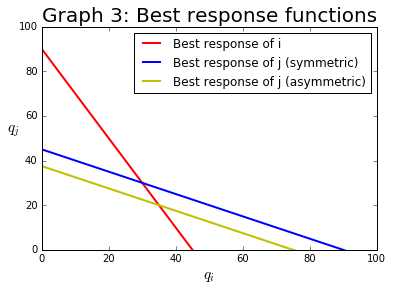

In [61]:
# We now compare the best response functions for both the symmetric and asymmetric case
plt.clf()
plt.plot(BR_i(a,q_j,c_i), q_j,'-', color = 'r', linewidth = 2, label="Best response of i")
plt.plot(q_i, BR_j(a,q_i,c_j),'-', color = 'b', linewidth = 2, label="Best response of j (symmetric)")
plt.plot(q_i, BR_j(a,q_i,c_j_h),'-', color = 'y', linewidth = 2, label="Best response of j (asymmetric)")
plt.title("Graph 3: Best response functions",fontsize = 20)
plt.xlabel("$q_i$",fontsize = 15)
plt.ylabel("$q_j$",fontsize = 15,rotation = 0)
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend(fontsize = 12)
plt.show()

# Latex/markdown uitleg over hoe de BR wordt ingevuld/uitgewerkt (Judith)

In [106]:
def cournot_i(a,c_i,c_j):
    cournot_i = (1/3)*(a - 2*c_i + c_j)
    return cournot_i

def cournot_j(a,c_i,c_j):
    cournot_j = (1/3)*(a + c_i - 2*c_j)
    return cournot_j

print("Best reponse of player i in the symmetric case equals " + str(cournot_i(a,c_i,c_j))[:2])
print("Best reponse of player j in the symmetric case equals " + str(cournot_j(a,c_i,c_j))[:2])
print("Best reponse of player i in the asymmetric case equals " + str(cournot_i(a,c_i,c_j_h))[:2])
print("Best reponse of player j in the asymmetric case equals " + str(cournot_j(a,c_i,c_j_h))[:2])

Best reponse of player i in the symmetric case equals 30
Best reponse of player j in the symmetric case equals 30
Best reponse of player i in the asymmetric case equals 35
Best reponse of player j in the asymmetric case equals 20


In [63]:
# We also check whether the FOC of the firms are satisfied. This is the case when the FOC is equal to zero
# The first two code lines are for the symmetric case, the latter two are for the asymmetric case
print ("The FOC of player i gives " + str((FOC_i(a,30,30,c_i))))
print ("The FOC of player j gives " + str((FOC_j(a,30,30,c_j))))
print ("The FOC of player i gives " + str((FOC_i(a,35,20,c_i))))
print ("The FOC of player j gives " + str((FOC_j(a,35,20,c_j_h))))

The FOC of player i gives 0
The FOC of player j gives 0
The FOC of player i gives 0
The FOC of player j gives 0


In Graph 3, one can see the best response functions for both firms under the symmetric (red and blue line) and asymmetric (red and yellow line) case. One can see that the $q_i$ is decreasing when $q_j$ is increasing, and vice versa. The intersection of the red and blue line is at $(q_i,q_j) = (30,30)$. The equilibrium quantity in a symmetric two firm case of both $q_i$ and $q_j$ is thus $30$, which can also be solved mathematically by setting the two best response functions equal to each other. This can also be seen in the best responses of player i above. There exists a (unique) symmetric equilibrium for both players choosing a quantity of $30$. 

The intersection of the red and yellow line is at $(q_i,q_j) = (33.3,23.3)$. The equilibrium quantity in the asymmetric case of  $q_i$ is thus $33.3$ and for $23.3$ for high-cost-firm j, which can again also be solved mathematically by setting the two best response functions equal to each other. A higher marginal costs ($c_{jh} > c_j$) thus results in lower production. Being the low-cost-firm increases the produced quantity in comparison with the symmetric case.

In [65]:
# Now we are curious to see the equilibrium price and equilbrium profits when both choose equilibrium quantities.
print ("Profit of player i in symmetric case equals " + str((profit_firm_i(a,30,30,c_i))) + " and equals " + str((profit_firm_i(a,35,20,c_i))) + " in the asymmetric case.")
print ("Profit of player j in symmetric case equals " + str((profit_firm_j(a,30,30,c_i))) + " and equals " + str((profit_firm_j(a,35,20,c_j_h))) + " in the asymmetric case.")
print ("Equilibrium price in symmetric case equals " + str(p(a,30,30)) + " and equals " + str(p(a,35,20)) + " in the asymmetric case.")

Profit of player i in symmetric case equals 900 and equals 1225 in the asymmetric case.
Profit of player j in symmetric case equals 900 and equals 400 in the asymmetric case.
Equilibrium price in symmetric case equals 40 and equals 45 in the asymmetric case.


### Consumer surplus

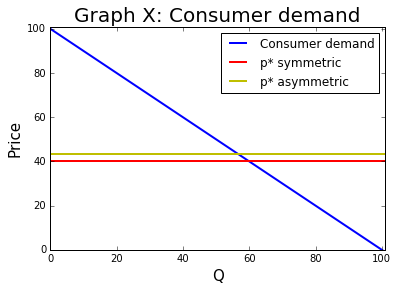

Symmetric Cournot: Consumer surplus is equal to 1800
Asymmetric Cournot: Consumer surplus is equal to 1512.5
Symmetric Stackelberg: Consumer surplus is equal to 1800
Asymmetric Stackelberg: Consumer surplus is equal to 1800


In [70]:
# We want to visualize the consumer demand with the calculated price in order to calculate consumer surplus.
Q = q_i + q_j

plt.clf()
plt.plot(Q, p(a,q_i,q_j),'-', color = 'b', linewidth = 2, label="Consumer demand")
plt.axhline(y=40, xmin=0, xmax=100, color = 'r', linewidth = 2, label="p* symmetric")
plt.axhline(y=43+1/3, xmin=0, xmax=100, color = 'y', linewidth = 2, label="p* asymmetric")
plt.title("Graph X: Consumer demand",fontsize = 20)
plt.xlabel("Q",fontsize = 15)
plt.ylabel("Price",fontsize = 15)
plt.xlim(0,101)
plt.ylim(0,101)
plt.legend(fontsize = 12)
plt.show()

# From the graph we calculate the consumer surplus, which is equal to the triangle between the blue and horizontal lines
print ("Symmetric Cournot: Consumer surplus is equal to " + str(((a-p(a,30,30))*(60))*1/2)[:4])
print ("Asymmetric Cournot: Consumer surplus is equal to " + str(((a-p(a,35,20))*(55))*1/2))
print ("Symmetric Stackelberg: Consumer surplus is equal to " + str(((a-p(a,30,30))*(60))*1/2)[:4])
print ("Asymmetric Stackelberg: Consumer surplus is equal to " + str(((a-p(a,30,30))*(60))*1/2)[:4])

### Stackelberg: Symmetric and Asymmetric

## Conclusion
||Symmetric Cournot|Asymmetric Cournot|Symmetric Stackelberg|Asymmetric Stackelberg|
|----|-------|
|$q_i$|30|33.33|
|$q_j$|30|23.33|
|$Q$|60|56.67|
|$p*$|40|43.33|
|$\pi_i$|900|1111.11|
|$\pi_j$|900|544.44|
|$\pi_{total}$|1800|1655.55|
|Consumer surplus|1800|1605.55|

## Discussion